## Introduction
Customer churn occurs when customers or subscribers stop using a company's product or serves. Customer churn rate is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers. We can predict customer behavior by analyzing customer data and develop focused retention programs to retain customers.

#### **Objectives:**
* Identify key factors influencing customer churn 
* Build machine learning model to predict customer churn 
* Provide insights and actionable  recommendations 

#### **Approaches:**
* Data assessing & cleaning
* Exploratory data analysis (EDA)
* Logistic regression, feature selections, parameter tuning, and result interpretation
* Suggestions & next steps 

#### **Key Findings:**
##### **I. Insights From EDA**
* Churn rate is 26.6%.
* Gender is not an indicative of churn. 
* Seniors have higher probability to churn.
* Customers without spouse and kids tend to churn.
* New customers have high churn rate.
* Customers with high monthly charges are more likely to churn. 
* Clients on monthly contact have much higher probability to churn.
* Clients with e-check payment are more likely to churn. 
* Clinets with paperless billing are more likely to churn.
* Customers with phone services and multiple lines have higher churn rate.
* Customers with fiber optic as internet service are more likely to churn.
* Customers who don't have online security and online back, device protection, tech support show much higher churn rate. 
* Lowest churn rate for customers with no internet service in all services.

##### **II. Insights From Modeling**
* Logistic regression to predict customer churn based on customer demographic information, account and service information, has 80% recall score.
* Customers with month-to-month contract, fiber optic internet, E-check payment and paperless billing have higher probability to churn.
* Senior customers are more likely to churn. Those with no children are more likey to churn.
* Customers with 2-year contract type, 1-year contract, phone services, online security and tech support have the most negative relation with churn.
* Customers with more additional internet services are less likely to churn.

#### **What's Next?**
* Share key insights about features (customer demographics, accounts and services) that impact churn rate with marketing & sales teams so they can strategize the rention initiatives accordingly.
* Look into features that greatly affact churn rate, such as month-to-month contact, fiber optic internet, E-check payment paperless billing and phone services. 
* Check multicollinearity among features that may impact performace of the model.
* Include more data and additional features that affect churn to improve model performance.

## **1. Import Packages & Load Data**

In [190]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [191]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Customer-Churn.csv')

## **2. Assessing Data**
Perform initial investigations on data to understand data structure, size, summary statistics, unique values for each column, data types and identify issues such as incorrect data type, missing values and outliers for data cleaning step.

### 2.1 General understanding

In [192]:
# Show first 5 entries
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [193]:
# High-level overview of data shape and composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [194]:
# Statistical information for numerical variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [195]:
# Check unique values for each column
for col in df:
    print(col)
    print(df[col].unique())
    print("")

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender
['Female' 'Male']

SeniorCitizen
[0 1]

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService
['No' 'Yes']

MultipleLines
['No phone service' 'No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['No' 'Yes' 'No internet service']

StreamingTV
['No' 'Yes' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'

### 2.2 Check Missing Values

In [196]:
# Check missing values, empty strings
df.apply(lambda x: x == ' ', axis = 1).mean()

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

* We found missing values in 'TotalCharges' in the assessing step. Now let's take a closer look at entries with missing values.

In [197]:
# Check entries with missing values/empty stings
df.query('TotalCharges == " "')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


* Those missing values are actually blank space in csv file and have to do with customers who just started the service for less than one month (tenure=0) and haven't paid anyting yet. Since there are only 11 missing values, and it doesn't affect our analysis, we'll delete those entries for simplicity.

### 2.3 Spot Outliers for Numerical Variables

In [198]:
# Detect outliers for numerical features using IQR method
df_num = df[['tenure', 'MonthlyCharges','TotalCharges']]
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

MonthlyCharges    False
TotalCharges      False
tenure            False
dtype: bool

> **Observations:**
*   Wrong data type for 'TotalCharges', should be float instead of object.
*   Adjust values for 'PaymentMethod' to make it easier to read for visualization.
*   Empty sting in 'TotalCharges' for customers who just started the service and haven't made any payment yet. 
*   There's no outliers for numerical features, therefore no need for adjustment.


## **3. Data Cleaning**
Clean the dataset based on the issues identified in the previous step.

### 3.1 Correct Data Type

In [199]:
# Change datatype for TotalCharges to int
# df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtypes

dtype('float64')

### 3.2 Rename Feature Values

In [200]:
# Rename values for PaymentMethod
df['PaymentMethod'].replace({'Electronic check': 'E-check' , 'Bank transfer (automatic)': 'Bank Transfer', 'Credit card (automatic)': 'Credit Card'}, inplace=True)
df['PaymentMethod'].unique()

array(['E-check', 'Mailed check', 'Bank Transfer', 'Credit Card'],
      dtype=object)

### 3.3 Missing Values

In [201]:
# Drop entries with missing values.
df = df.dropna()

# Test result
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## **4. Exploratory Data Analysis**
Let's explore and visualize individual features to identify patterns and get first ideas on topics to investigate. The data set contains 21 columns and those features can be grouped into different categories:

**Our target variable:**
* churn: whether customers left within the last month or not

**Customer demographic info**
* gender, SeniorCitizen (age range), partners and dependents

**Services that each customer has signed up for** 
* phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

**Customer account information** 
* tenure (how long they’ve been a customer), contract, payment method, paperless billing, monthly charges, and total charges



### 4.1 Target Variable: Churn

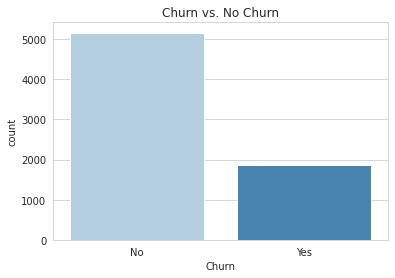

In [202]:
sns.set_style('whitegrid')
sns.countplot(x=df['Churn'], palette='Blues').set_title('Churn vs. No Churn')
plt.show()

In [203]:
# Churn rate
df['Churn'].value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

> **Insights:**
*   The plot shows that about 1900 customers left within the last month and 5100 customers choose to stay with the service.
*   Churn rate is 26.6%. There's imbalanced classification problem and we'll keep that in mind when building machine learning model.


### 4.2 Customer Demographic Variables: Gender, SeniorCitizen, Partner & Dependents

In [204]:
# Add churn_dummy for visualization purpose. 
df['Churn_dummy'] = df.Churn.replace(('Yes', 'No'), (1, 0))

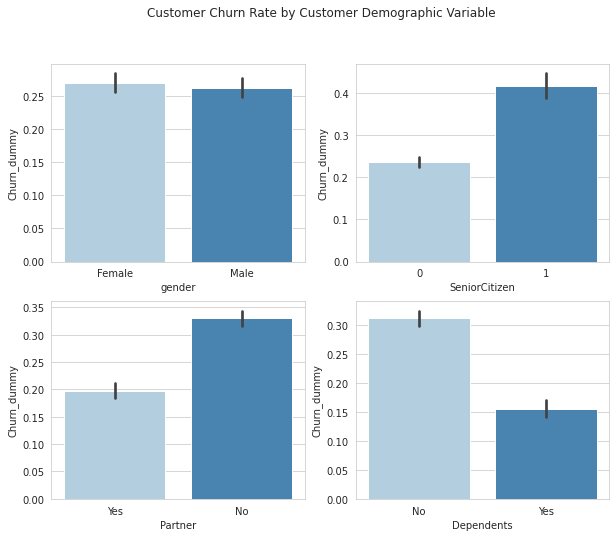

In [205]:
# Plot churn rate for customer demographic variables
fig, ax = plt.subplots(2,2, figsize=(10, 8))

sns.barplot(data=df, x='gender', y='Churn_dummy', palette='Blues', ax=ax[0,0])
sns.barplot(data=df, x='SeniorCitizen', y='Churn_dummy', palette='Blues', ax=ax[0,1])
sns.barplot(data=df, x='Partner', y='Churn_dummy', palette='Blues', ax=ax[1,0])
sns.barplot(data=df, x='Dependents', y='Churn_dummy', palette='Blues', ax=ax[1,1])
plt.suptitle('Customer Churn Rate by Customer Demographic Variable')

plt.show()

> **Insights:**
*   Gender doesn't have much impact on churn rate.
*   Senior citizens has higher probability to churn.
*   Customers without spouse tend to churn.
*   Customers without kids tend shows much higher churn rate as compared to those with dependents.


### 4.3 Customer Account Variables
Tenure (how long they’ve been a customer), contract, payment method, paperless billing, monthly charges, and total charges are classified into customer account info.

#### 4.3.1 Numerical Features: Tenure, Monthly Charges & Total Charges

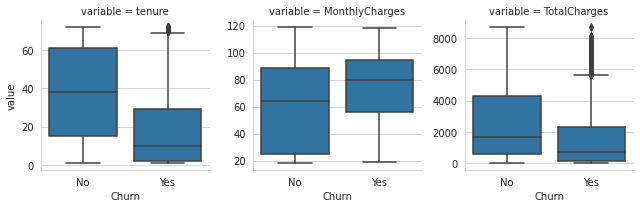

In [206]:
# Box plot for three numerical features
df_melt = df.melt(id_vars=['customerID', 'Churn'])
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
grid = sns.axisgrid.FacetGrid(df_melt[df_melt.variable.isin(cols)], col='variable', sharey=False)
grid.map(sns.boxplot, 'Churn','value')
plt.show()

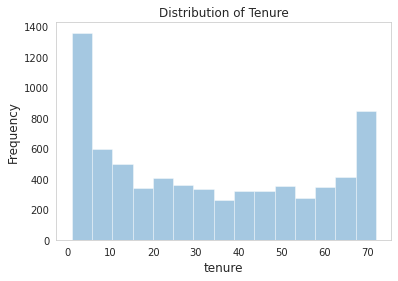

In [207]:
# show the distribution of tenure.
ax = sns.distplot(df['tenure'], kde=False)
ax.grid(False)
plt.xlabel('tenure', fontsize='large')
plt.ylabel('Frequency', fontsize='large')
plt.title('Distribution of Tenure')
plt.show()

> **Insights:**
*   New customers have high churn rate. Churned customers have shorter tenure with median of around 10 months while non-churned customers have longer tenure with median around 39 months.
*   Customers with higher monthly charges are more likely to churn. 
*   'TotalCharges' is the result of tenure and MonthlyCharges, both of which make more sense on an individual basis.
*   There are many new customers who just started service with the company for less than 10 months and many loyal customers who have stayed with the company for more than 5 years.

#### 4.3.2 Categorical Features: Contract, Payment Method & Paperless Billing

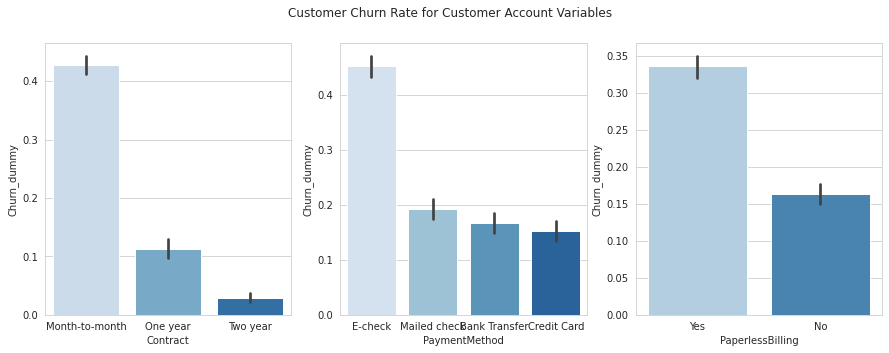

In [208]:
# Plot churn rate 
fig, ax = plt.subplots(1,3, figsize=(15, 5))

sns.barplot(data=df, x='Contract', y='Churn_dummy', palette='Blues', ax=ax[0])
sns.barplot(data=df, x='PaymentMethod', y='Churn_dummy', palette='Blues', ax=ax[1])
sns.barplot(data=df, x='PaperlessBilling', y='Churn_dummy', palette='Blues', ax=ax[2])
plt.suptitle('Customer Churn Rate for Customer Account Variables')

plt.show()

> **Insights:**
*   Clients on monthly contact have much higher probability to churn as compared to those on one or two year contracts.
*   Among all payment methods, clients with e-check are more likely to churn.
*   Clinets with paperless billing are more likely to churn.


### 4.4 Services Info Variables
Services that each customer has signed up for: Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies

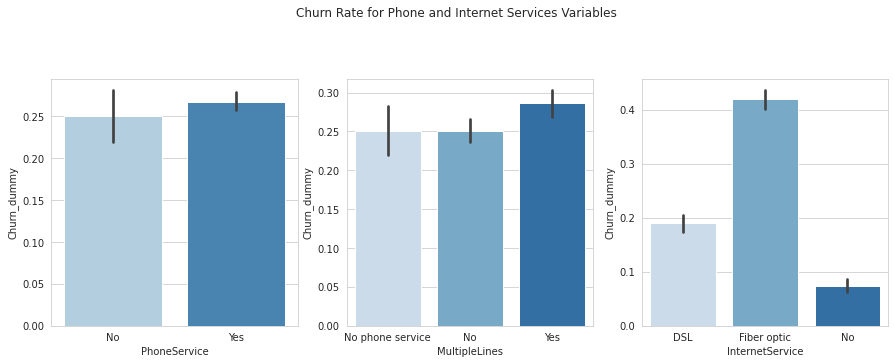

In [209]:
# Plot churn rate for clients with Phone and Internet services
feature= ['PhoneService', 'MultipleLines', 'InternetService']

plt.figure(figsize = (15,10))
for i in enumerate(feature):
	plt.subplot(2, 3, i[0]+1)
	sns.barplot(i[1], y='Churn_dummy', data=df, palette='Blues')
plt.suptitle('Churn Rate for Phone and Internet Services Variables')

plt.show()

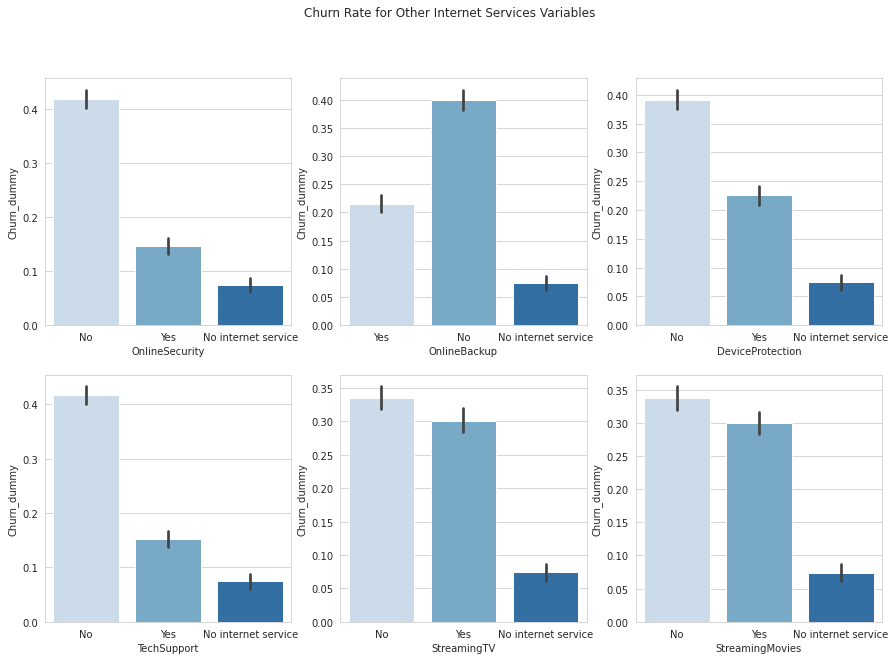

In [210]:
# Plot churn rate for additional services for customers with internet
feature= columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize = (15,10))
for i in enumerate(feature):
	plt.subplot(2, 3, i[0]+1)
	sns.barplot(i[1], y='Churn_dummy', data=df, palette='Blues')
plt.suptitle('Churn Rate for Other Internet Services Variables')

plt.show()

> **Insights:**
*   Customers with phone services and those have multiple lines have slightly higher churn rate.
*   Customers with fiber optic as internet service are more likely to churn. 
*   Customers who don't subscribe streaming TV and movies serives have slightly higher churn rate than those who subscribe. 
*   Customers with no online security and online back are more likely to churn.
*   Customers who don't have Tech support show much higher churn rate.
*   Customers without device protection have higher churn rate.
*   Lowest churn rate for customers with no internet service in all services. 




### 4.5 Insights from EDA

* About 1900 customers left within the last month and 5100 customers choose to stay with the service.Churn rate is 26.6%. 
* Gender doesn't have much impact on churn rate.
* Senior citizens has higher probability to churn.
* Customers without spouse and kids tend to churn.
* New customers have high churn rate. 
* Customers with higher monthly charges are more likely to churn. There are many new customers who just started service with the company for less than 10 months and many loyal customers who have stayed with the company for more than 5 years.
* Clients on monthly contact have much higher probability to churn as compared to those on one or two year contracts.
* Among all payment methods, clients with e-check are more likely to churn. Clinets with paperless billing are more likely to churn.
* Customers with phone services and those have multiple lines have slightly higher churn rate.
* Customers with fiber optic as internet service are more likely to churn.
* Customers who don't subscribe streaming TV and movies serives have slightly higher churn rate than those who subscribe.
* Customers who don't have online security and online back, device protection, tech support show much higher churn rate. Lowest churn rate for customers with no internet service in all services.

## 5. Data Modeling

### 5.1 Data Preparation



#### 5.1.1  Feature Engineering
* **Feature generation & selection**: generate new features and select features useful for the model
* **Label encoding** for categorical features with binary values (Yes and No): replace values with 1 and 0.
* **One-hot encoding** for categorical features with more than two values: create a new column for each value and assign 1 or 0. 


In [211]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_dummy
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,E-check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Transfer,42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,E-check,70.70,151.65,Yes,1


In [212]:
# Generate new feature 'additional_services_count' by summing up the number of addtional service.
df['additional_services_count'] = (df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)

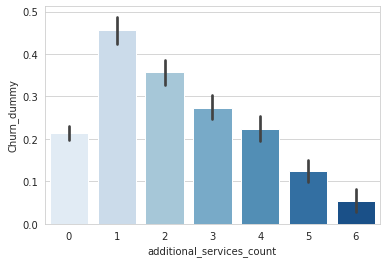

In [213]:
# Plot churn rate for the new feature
sns.barplot(data=df, x='additional_services_count', y='Churn_dummy', palette='Blues')
plt.show()

> **Insights:**
*   Clients with more number of additional services have lower churn rate. The more number of services, the lower the rate. 



In [214]:
# Convert yes/no values in 'Churn' to 1 and 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Drop unrelated columns
data_raw = df.drop(columns = ['customerID', 'gender', 'Churn_dummy', 'TotalCharges'], axis=1, inplace=False)

In [215]:
# Convert categorical variable into dummy
df = pd.get_dummies(data_raw, drop_first=True)

In [216]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,additional_services_count,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit Card,PaymentMethod_E-check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,0,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,1,2,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,0,3,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


#### 5.1.2 Train-Test Split
The dataset is split into 80% training data and 20% test data. The 'Churn' column is the y value while the remaining columns would be X values. 

In [217]:
# Identify X and y variables
y = df['Churn']
X = df.drop('Churn', axis=1)

In [218]:
X

,SeniorCitizen,tenure,MonthlyCharges,additional_services_count,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit Card,PaymentMethod_E-check,PaymentMethod_Mailed check
0,0,1,29.85,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,2,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,3,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,5,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,4,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [219]:
# Applying sklearn's splitter function train_test_split 
# Use stratify parameter to resolve any class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666, stratify=y, train_size=0.8)

### 5.2 Logistic Regression

#### 5.2.1 Feature Selections

In [220]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(class_weight='balanced')

#### 5.2.2 GridSearch & Parameter Tuning

In [232]:
C = np.arange(0.3, 0.5, 0.005)
penalty = ['l1', 'l2']

param_grid = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(lgr, param_grid, scoring='recall', cv=5) 
grid_result = grid_search.fit(X_train, y_train)

result_lgr = pd.DataFrame(grid_result.cv_results_)
result_lgr.sort_values(by='mean_test_score', ascending=False)[:4]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
73,0.136795,0.009130,0.003756,0.000093,0.48,l2,"{'C': 0.48000000000000015, 'penalty': 'l2'}",0.819398,0.809365,0.789298,0.785953,0.752508,0.791304,0.023036,1
29,0.135432,0.005796,0.003699,0.000053,0.37,l2,"{'C': 0.37000000000000005, 'penalty': 'l2'}",0.819398,0.806020,0.789298,0.785953,0.752508,0.790635,0.022545,2
75,0.133438,0.004668,0.003787,0.000151,0.485,l2,"{'C': 0.48500000000000015, 'penalty': 'l2'}",0.819398,0.809365,0.792642,0.785953,0.745819,0.790635,0.025348,2
7,0.135785,0.012866,0.003904,0.000428,0.315,l2,"{'C': 0.315, 'penalty': 'l2'}",0.819398,0.809365,0.785953,0.785953,0.752508,0.790635,0.023133,2


In [233]:
# Recall score for best fit model
best_lgr = grid_search.best_estimator_
y_pred = best_lgr.predict(X_test)
print(recall_score(y_test, y_pred))

0.7967914438502673


> **Insights:**
*   We are more interested in finding customers who will churn, so we'll choose recall score as the metric in cross validation and measuring generalization ability.
*   The best model has a recall score of 0.8 on testing dataset.



#### 5.3.3 Model Result Interpretation

In [267]:
Coeffient = best_lgr.coef_.flatten()
coeffient_list = pd.DataFrame({'Coeffient':Coeffient}, index=X.columns).sort_values(by='Coeffient', ascending=False)
coeffient_list

,Coeffient
InternetService_Fiber optic,0.447983
PaymentMethod_E-check,0.389167
MultipleLines_No phone service,0.314481
StreamingMovies_Yes,0.305965
SeniorCitizen,0.293952
PaperlessBilling_Yes,0.275992
StreamingTV_Yes,0.209130
MultipleLines_Yes,0.171747
MonthlyCharges,0.018310
Partner_Yes,0.017661


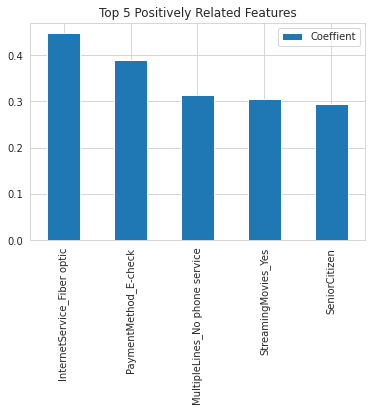

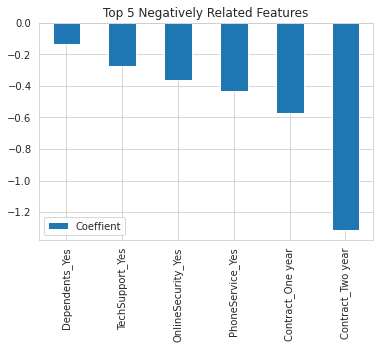

In [276]:
# Plot top 5 features correlated with churn
coeffient_list[:5].plot(kind='bar').set_title('Top 5 Positively Related Features')
coeffient_list[-6:].plot(kind='bar').set_title('Top 5 Negatively Related Features');            

> **Insights:**
*   Logistic regression to predict customer churn based on client demographic information, account preference and service information, has 80% recall score.
*    Customers with month-to-month contract, fiber optic internet, E-check payment and paperless billing have higher probability to churn.
*    Senior clients are more likely to churn. Those with no children are more likey to churn.
*    Customers with 2-year contract type, 1-year contract, phone services, online security and tech support have the most negative relation with churn. 
*    Customers with more additional internet services are less likely to churn.




### 5.3 Random Forest

In [269]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [277]:
n_estimators = [i for i in range(50,350,10)]
max_depth = [i for i in range(7,13,1)]

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

grid_search = GridSearchCV(rfc, param_grid, scoring='recall', cv=5)
grid_result = grid_search.fit(X_train, y_train)

result_rfc = pd.DataFrame(grid_result.cv_results_)
result_rfc.sort_values(by='mean_test_score', ascending=False)[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
176,1.323174,0.017795,0.087270,0.004246,12,310,"{'max_depth': 12, 'n_estimators': 310}",0.602007,0.505017,0.484950,0.548495,0.511706,0.530435,0.041266,1
154,0.379638,0.003800,0.028753,0.003440,12,90,"{'max_depth': 12, 'n_estimators': 90}",0.602007,0.518395,0.484950,0.545151,0.501672,0.530435,0.040940,1
157,0.513887,0.009970,0.035356,0.000749,12,120,"{'max_depth': 12, 'n_estimators': 120}",0.612040,0.508361,0.484950,0.545151,0.494983,0.529097,0.046217,3
159,0.595674,0.019003,0.041965,0.002797,12,140,"{'max_depth': 12, 'n_estimators': 140}",0.612040,0.505017,0.474916,0.551839,0.498328,0.528428,0.048696,4
122,0.288320,0.007899,0.022205,0.001648,11,70,"{'max_depth': 11, 'n_estimators': 70}",0.612040,0.491639,0.471572,0.555184,0.508361,0.527759,0.050385,5


In [278]:
# Recall score for best fit model
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7917555081734187


> **Insights:**
* Logistic regression model has slightly better performance, so we'll stick with that model.

## 6.What's Next?
* Share key insights about features (customer demographics, accounts and services) that impact churn rate with marketing & sales teams so they can strategize the rention initiatives accordingly.
* Look into features that greatly affact churn rate, such as month-to-month contact, fiber optic internet, E-check payment paperless billing and phone services. 
* Check multicollinearity among features that may impact performace of the model.
* Include more data and additional features that affect churn to improve model performance.
